In [1]:
from pathlib import Path

import pandas as pd
from pymol import cmd

import src.colorscheme as color

In [6]:
cmd.reinitialize()

WD = Path("wd/BLDB")
PDB1 = WD / "1GHP.pdb"
PDB2 = WD / "1FQG.pdb"
PDB3 = WD / "SM_0_BLDB.pdb"
PDB4 = WD / "FM_4_BLDB.pdb"
cmd.load(PDB2, "PDB2")
cmd.load(PDB1, "PDB1")
cmd.load(PDB3, "PDB3")
cmd.load(PDB4, "PDB4")
cmd.align("PDB2", "PDB1")
cmd.align("PDB3", "PDB1")
cmd.align("PDB4", "PDB1")

cmd.remove("solvent")
cmd.remove('PDB1 and resn SO4')
cmd.remove('PDB1 and chain B')
cmd.remove('PDB2 and resn SO4')
cmd.remove('PDB2 and chain B')
cmd.set('transparency', 0.5, 'polymer')

cmd.zoom("all", buffer=0)
cmd.rotate("x", 80)
cmd.rotate("y", -15)
cmd.rotate("z", 90)

cmd.hide("cartoon", "PDB1")
cmd.hide("cartoon", "PDB2")
cmd.hide("cartoon", "PDB3")
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB1")
cmd.hide("sticks", "PDB2")
cmd.hide("sticks", "PDB3")
cmd.hide("sticks", "PDB4")

cmd.show("cartoon", "PDB2")
cmd.show("sticks", "PDB2 and not polymer")
cmd.show("sticks", "PDB2 and resi 130")
cmd.show("sticks", "PDB2 and resi 170")
cmd.show("sticks", "PDB2 and resi 235")
cmd.show("sticks", "PDB2 and resi 237")
cmd.show("sticks", "PDB2 and resi 243")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
# cmd.spectrum("b", f"0x{color.CS_FG_B[1:]} 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB2.stem}.png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB2")
cmd.hide("sticks", "PDB2")

# SM
cmd.show("cartoon", "PDB3")
df = pd.read_csv("../../data/BLDB/generated/C/SM_0_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
# cmd.spectrum("b", f"0x{color.CS_FG_B[1:]} 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB3 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB3 and resi {f}')
cmd.png(str(WD / f"{PDB3.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB3")
cmd.hide("sticks", "PDB3")

# FM
cmd.show("cartoon", "PDB4")
df = pd.read_csv("../../data/BLDB/generated/C/FM_4_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
# cmd.spectrum("b", f"0x{color.CS_FG_B[1:]} 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB4 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB4 and resi {f}')
cmd.png(str(WD / f"{PDB4.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB4")

In [7]:
cmd.reinitialize()

WD = Path("wd/CYTC")
PDB1 = WD / "1HRC.pdb"
PDB3 = WD / "SM_1_CYTC.pdb"
PDB4 = WD / "FM_0_CYTC.pdb"
cmd.load(PDB1, "PDB1")
cmd.load(PDB3, "PDB3")
cmd.load(PDB4, "PDB4")
cmd.align("PDB3", "PDB1")
cmd.align("PDB4", "PDB1")

cmd.remove("solvent")
cmd.set('transparency', 0.5, 'polymer')

cmd.zoom("all", buffer=-3)
cmd.rotate("x", 75)
cmd.rotate("y", 10)

cmd.hide("cartoon", "PDB1")
cmd.hide("cartoon", "PDB3")
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB1")
cmd.hide("sticks", "PDB3")
cmd.hide("sticks", "PDB4")

cmd.show("cartoon", "PDB1")
cmd.show("sticks", "PDB1 and not polymer")
cmd.show("sticks", "PDB1 and resi 18")
cmd.show("sticks", "PDB1 and resi 80")
cmd.show("sticks", "PDB1 and resi 14")
cmd.show("sticks", "PDB1 and resi 17")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB1.stem}.png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB1")
cmd.hide("sticks", "PDB1")

# SM
cmd.show("cartoon", "PDB3")
df = pd.read_csv("../../data/CYTC/generated/C/SM_1_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB3 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB3 and resi {f}')
cmd.png(str(WD / f"{PDB3.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB3")
cmd.hide("sticks", "PDB3")

# FM
cmd.show("cartoon", "PDB4")
df = pd.read_csv("../../data/CYTC/generated/C/FM_0_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB4 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB4 and resi {f}')
cmd.png(str(WD / f"{PDB4.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB4")

In [9]:
cmd.reinitialize()

WD = Path("wd/GFP")
PDB1 = WD / "4KW4.pdb"
PDB3 = WD / "SM_10_GFP.pdb"
PDB4 = WD / "FM_49_GFP.pdb"
cmd.load(PDB1, "PDB1")
cmd.load(PDB3, "PDB3")
cmd.load(PDB4, "PDB4")
cmd.align("PDB3", "PDB1")
cmd.align("PDB4", "PDB1")

cmd.remove("solvent")
cmd.set('transparency', 0.5, 'polymer')

cmd.zoom("all", buffer=2)
cmd.rotate("x", 45)
cmd.rotate("y", 45)
cmd.rotate("z", 45)

cmd.hide("cartoon", "PDB1")
cmd.hide("cartoon", "PDB3")
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB1")
cmd.hide("sticks", "PDB3")
cmd.hide("sticks", "PDB4")

cmd.show("cartoon", "PDB1")
# cmd.show("sticks", "PDB1 and not polymer")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB1.stem}.png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB1")
cmd.hide("sticks", "PDB1")

# SM
cmd.show("cartoon", "PDB3")
df = pd.read_csv("../../data/GFP/generated/C/SM_10_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB3 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB3 and resi {f}')
cmd.png(str(WD / f"{PDB3.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB3")
cmd.hide("sticks", "PDB3")

# FM
cmd.show("cartoon", "PDB4")
df = pd.read_csv("../../data/GFP/generated/C/FM_49_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB4 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB4 and resi {f}')
cmd.png(str(WD / f"{PDB4.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB4")

In [11]:
cmd.reinitialize()

WD = Path("wd/RAS")
PDB1 = WD / "4OBE.pdb"
PDB3 = WD / "SM_27_RAS.pdb"
PDB4 = WD / "FM_13_RAS.pdb"
cmd.load(PDB1, "PDB1")
cmd.load(PDB3, "PDB3")
cmd.load(PDB4, "PDB4")
cmd.remove('PDB1 and chain B')
cmd.remove('PDB1 and resn MG')
cmd.align("PDB3", "PDB1")
cmd.align("PDB4", "PDB1")

cmd.remove("solvent")
cmd.set('transparency', 0.5, 'polymer')

cmd.zoom("all", buffer=-4)
cmd.rotate("x", 100) 
cmd.rotate("y", -20)
cmd.rotate("z", -90)

cmd.hide("cartoon", "PDB1")
cmd.hide("cartoon", "PDB3")
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB1")
cmd.hide("sticks", "PDB3")
cmd.hide("sticks", "PDB4")

cmd.show("cartoon", "PDB1")
cmd.show("sticks", "PDB1 and not polymer")
cmd.show("sticks", "PDB1 and resi 12")
cmd.show("sticks", "PDB1 and resi 16")
cmd.show("sticks", "PDB1 and resi 34")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
cmd.png(str(WD / f"{PDB1.stem}.png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB1")
cmd.hide("sticks", "PDB1")

# SM
cmd.show("cartoon", "PDB3")
df = pd.read_csv("../../data/RAS/generated/C/SM_27_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB3 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB3 and resi {f}')
cmd.png(str(WD / f"{PDB3.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB3")
cmd.hide("sticks", "PDB3")

# FM
cmd.show("cartoon", "PDB4")
df = pd.read_csv("../../data/RAS/generated/C/FM_13_consurf_grades.csv")
cmd.spectrum("b", f"0x222222 0x{color.CS_FG_A[1:]}", minimum=1, maximum=9, selection="polymer")
for f in df[df["F/S"] == "f"]["POS"].values:
    cmd.color('0xFF2A00', f'PDB4 and resi {f}')
for f in df[df["F/S"] == "s"]["POS"].values:
    cmd.color('0x6DFF00', f'PDB4 and resi {f}')
cmd.png(str(WD / f"{PDB4.stem} ({PDB1.stem}).png"), width=1000, height=1000, dpi=300)
cmd.hide("cartoon", "PDB4")
cmd.hide("sticks", "PDB4")

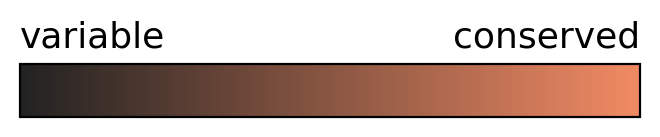

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(4, 0.7), dpi=200)
fig.subplots_adjust(bottom=0.5)

cmap = mcolors.LinearSegmentedColormap.from_list("ramachandran_cmap", ["#222222", color.CS_FG_A])
# cmap = mcolors.LinearSegmentedColormap.from_list("ramachandran_cmap", [color.CS_FG_B, color.CS_FG_A])
norm = mpl.colors.Normalize(vmin=0, vmax=9)
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
cb.set_ticks([])
cb.ax.text(0, 1.2, 'variable', transform=cb.ax.transAxes, ha='left', va='bottom', fontsize=13)
cb.ax.text(1.0, 1.2, 'conserved', transform=cb.ax.transAxes, ha='right', va='bottom', fontsize=13)
plt.show()